In [1]:
import math
from itertools import combinations,permutations
import igraph as ig
import random
from libs.order_based_seed_gen.numbering import *

In [2]:
sub=["d",5,4]
big=sorted(["a","f","d","fd","ee"])

In [3]:
print([math.factorial(i) for i in range(len(big)+1)])

[1, 1, 2, 6, 24, 120]


In [4]:
for i in range(len(big)+1):
    for perm in permutations(big,i):
        print(perm)
        print(generatePermutationNumber(perm,big))

()
0
('a',)
0
('d',)
0
('ee',)
0
('f',)
0
('fd',)
0
('a', 'd')
0
('a', 'ee')
0
('a', 'f')
0
('a', 'fd')
0
('d', 'a')
1
('d', 'ee')
0
('d', 'f')
0
('d', 'fd')
0
('ee', 'a')
1
('ee', 'd')
1
('ee', 'f')
0
('ee', 'fd')
0
('f', 'a')
1
('f', 'd')
1
('f', 'ee')
1
('f', 'fd')
0
('fd', 'a')
1
('fd', 'd')
1
('fd', 'ee')
1
('fd', 'f')
1
('a', 'd', 'ee')
0
('a', 'd', 'f')
0
('a', 'd', 'fd')
0
('a', 'ee', 'd')
1
('a', 'ee', 'f')
0
('a', 'ee', 'fd')
0
('a', 'f', 'd')
1
('a', 'f', 'ee')
1
('a', 'f', 'fd')
0
('a', 'fd', 'd')
1
('a', 'fd', 'ee')
1
('a', 'fd', 'f')
1
('d', 'a', 'ee')
2
('d', 'a', 'f')
2
('d', 'a', 'fd')
2
('d', 'ee', 'a')
3
('d', 'ee', 'f')
0
('d', 'ee', 'fd')
0
('d', 'f', 'a')
3
('d', 'f', 'ee')
1
('d', 'f', 'fd')
0
('d', 'fd', 'a')
3
('d', 'fd', 'ee')
1
('d', 'fd', 'f')
1
('ee', 'a', 'd')
4
('ee', 'a', 'f')
2
('ee', 'a', 'fd')
2
('ee', 'd', 'a')
5
('ee', 'd', 'f')
2
('ee', 'd', 'fd')
2
('ee', 'f', 'a')
3
('ee', 'f', 'd')
3
('ee', 'f', 'fd')
0
('ee', 'fd', 'a')
3
('ee', 'fd', 'd')
3
('

In [5]:
def generateCombinationNumberLight(sublist, totalList):
    eligibleList=sorted(totalList)
    voterList=sorted(sublist)
    combiNumber=0

    #Simplified expression? Sum(i=0:V-1|sum(k=1:(j(i)-j(i-1))-i|C(V-1 among N-j(i)+1)))
    
    nVoters=len(voterList)
    nEligible=len(eligibleList)
    nHoles=nEligible-nVoters
    
    foundHoles=0
    foundVoters=0
    
    j=searchFromIn(voterList,eligibleList)
    
    for i in range(nVoters):
        voter=voterList[i]
        
        if i==0:
            diff=j(i)
        else:
            diff=j(i)-(j(i-1)+1)

        for hole in range(0,diff):#if diff=0 range outputs []
            combiNumber+=nbCombi(nVoters-(i+1),nEligible-(j(i)-hole))

    return combiNumber

In [6]:
def generateCombinationNumberLightest(sublist, totalList):
    eligibleList=sorted(totalList)
    voterList=sorted(sublist)

    #Simplified expression:
    #=Sum(k=0:(j(0)-1)|C(V-1 among N-j(0)+k))
    #+Sum(i=1:V-1|sum(k=0:(j(i)-j(i-1)-2)|C(V-(i+1) among N-j(i)+k)))
    
    nVoters=len(voterList)
    nEligible=len(eligibleList)
    
    j=searchFromIn(voterList,eligibleList)

    firstElement=sum([nbCombi(nVoters-1,nEligible-j(0)+k)  for k in range(0,j(0))])
    combiNumber=firstElement+sum([
                                sum([
                                    nbCombi(nVoters-i-1,nEligible-j(i)+k) 
                                    for k in range(0,j(i)-j(i-1)-1)]) 
                                for i in range(1,nVoters)])
    return combiNumber

In [7]:
for i in range(len(big)+1):
    for perm in combinations(big,i):
        print(perm)
        ref=generateCombinationNumber(perm,big)
        light=generateCombinationNumberLight(perm,big)
        lightest=generateCombinationNumberLightest(perm,big)
        print(ref,light,lightest)
        assert(ref==light)
        assert(ref==lightest)

()
0 0 0
('a',)
0 0 0
('d',)
1 1 1
('ee',)
2 2 2
('f',)
3 3 3
('fd',)
4 4 4
('a', 'd')
0 0 0
('a', 'ee')
1 1 1
('a', 'f')
2 2 2
('a', 'fd')
3 3 3
('d', 'ee')
4 4 4
('d', 'f')
5 5 5
('d', 'fd')
6 6 6
('ee', 'f')
7 7 7
('ee', 'fd')
8 8 8
('f', 'fd')
9 9 9
('a', 'd', 'ee')
0 0 0
('a', 'd', 'f')
1 1 1
('a', 'd', 'fd')
2 2 2
('a', 'ee', 'f')
3 3 3
('a', 'ee', 'fd')
4 4 4
('a', 'f', 'fd')
5 5 5
('d', 'ee', 'f')
6 6 6
('d', 'ee', 'fd')
7 7 7
('d', 'f', 'fd')
8 8 8
('ee', 'f', 'fd')
9 9 9
('a', 'd', 'ee', 'f')
0 0 0
('a', 'd', 'ee', 'fd')
1 1 1
('a', 'd', 'f', 'fd')
2 2 2
('a', 'ee', 'f', 'fd')
3 3 3
('d', 'ee', 'f', 'fd')
4 4 4
('a', 'd', 'ee', 'f', 'fd')
0 0 0


In [8]:
list(range(0))


[]

In [9]:
numberingList=[]
for i in range(len(big)):
    for permut in permutations(big,i):
        print(permut)
        numberingList.append(generateArrangementNumber(permut,big))
        print(numberingList[-1])
print("numberingList:",sorted(numberingList))
print("len:",len(numberingList))
sortedList=sorted(numberingList)
for i in range(len(sortedList)-1):
    assert i==sortedList[i], "i:{} ; list[i]:{}".format(i,sortedList[i])
    assert sortedList[i]+1==sortedList[i+1], "list[i]:{} ; list[i+1]:{}".format(sortedList[i],sortedList[i+1])


()
0
('a',)
1
('d',)
2
('ee',)
3
('f',)
4
('fd',)
5
('a', 'd')
6
('a', 'ee')
8
('a', 'f')
10
('a', 'fd')
12
('d', 'a')
7
('d', 'ee')
14
('d', 'f')
16
('d', 'fd')
18
('ee', 'a')
9
('ee', 'd')
15
('ee', 'f')
20
('ee', 'fd')
22
('f', 'a')
11
('f', 'd')
17
('f', 'ee')
21
('f', 'fd')
24
('fd', 'a')
13
('fd', 'd')
19
('fd', 'ee')
23
('fd', 'f')
25
('a', 'd', 'ee')
26
('a', 'd', 'f')
32
('a', 'd', 'fd')
38
('a', 'ee', 'd')
27
('a', 'ee', 'f')
44
('a', 'ee', 'fd')
50
('a', 'f', 'd')
33
('a', 'f', 'ee')
45
('a', 'f', 'fd')
56
('a', 'fd', 'd')
39
('a', 'fd', 'ee')
51
('a', 'fd', 'f')
57
('d', 'a', 'ee')
28
('d', 'a', 'f')
34
('d', 'a', 'fd')
40
('d', 'ee', 'a')
29
('d', 'ee', 'f')
62
('d', 'ee', 'fd')
68
('d', 'f', 'a')
35
('d', 'f', 'ee')
63
('d', 'f', 'fd')
74
('d', 'fd', 'a')
41
('d', 'fd', 'ee')
69
('d', 'fd', 'f')
75
('ee', 'a', 'd')
30
('ee', 'a', 'f')
46
('ee', 'a', 'fd')
52
('ee', 'd', 'a')
31
('ee', 'd', 'f')
64
('ee', 'd', 'fd')
70
('ee', 'f', 'a')
47
('ee', 'f', 'd')
65
('ee', 'f', 'f

In [10]:
formatedGraphPath="../graphs/formatted/"

In [11]:
def formatVertexIds(file_path, delemiter=" "):
    """ We expect a file containing row of the format
        vertexId delemiter vertexId
    """
    fileName = file_path.split("/")[-1]
    new_file_path = formatedGraphPath + fileName 
    with open(new_file_path,'w') as formated_file:
        with open(file_path) as old_file:
                for line in old_file:
                    columns = line.split(delemiter)
                    formated_file.write("V" + columns[0] + delemiter + "V" + columns[1])

In [12]:
def orderBasedWorkerSelection(filename, nVoters, nWorkers, voterSeed, format="ncol", numGenFunction=generateArrangementNumber):
    filepath = formatedGraphPath + "/" + filename
    graph=ig.Graph.Read(filepath,format="ncol").as_undirected()
    
    vertices = graph.vs["name"]
    
    random.seed(voterSeed) 
    
    voters = random.sample(vertices, nVoters)
    
    seed = numGenFunction(voters, vertices)
    
    random.seed(seed)
    
    workers = random.sample(vertices, nWorkers)
    
    return workers

In [13]:
workersList=orderBasedWorkerSelection("facebook_combined.txt", 85, 100)

TypeError: orderBasedWorkerSelection() missing 1 required positional argument: 'voterSeed'

In [ ]:
biggest=range(0,20)
rev=biggest[::-1]
print(len(biggest),generateArrangementNumber(rev,biggest))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[[1, 4, 15, 64, 325, 1956, 13699, 109600, 986409, 9864100, 108505111, 1302061344, 16926797485, 236975164804, 3554627472075, 56874039553216, 966858672404689, 17403456103284420, 330665665962403999, 6613313319248080000, 138879579704209680021, 3055350753492612960484, 70273067330330098091155, 1686553615927922354187744, 42163840398198058854693625, 1096259850353149530222034276, 29599015959535037315994925479, 828772446866981044847857913440, 24034400959142450300587879489789, 721032028774273509017636384693700, 22351992892002478779546727925504731, 715263772544079320945495293616151424, 2360370449395461759120134468933

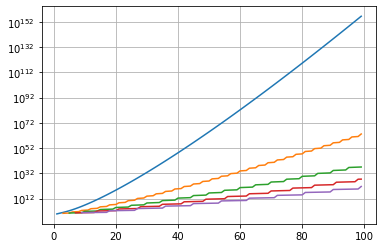

In [68]:
from matplotlib import pyplot as plt
fig,ax = plt.subplots()
X=list(range(1,100))
Y=[list(map(lambda x:generateArrangementNumber(list(range(x))[::-1][:x//k],range(x)),X)) for k in range(1,10,2)]
print(X)
print(Y)
ax.set_yscale("log")
ax.grid()
for y in Y:
    ax.plot([X[idx] for idx,i in enumerate(y) if i>0],[i for i in y if i>0])


In [50]:
list(range(10))[::-1][:10//3]

[9, 8, 7]